# 🏆 About Project 

## 🎯  Objective 

Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals. By leveraging machine learning techniques, insurers can predict more accurately the insurance costs tailored to individual profiles, leading to more competitive pricing and better risk management.

**Insurance Cost Prediction need**
The primary need for this project arises from the challenges insurers face in pricing policies accurately while remaining competitive in the market. Inaccurate predictions can lead to losses for insurers and unfairly high premiums for policyholders. By implementing a machine learning model, insurers can:
- Enhance Precision in Pricing: Use individual data points to determine premiums that reflect actual risk more closely than generic estimates.
- Increase Competitiveness: Offer rates that are attractive to consumers while ensuring that the pricing is sustainable for the insurer.
- Improve Customer Satisfaction: Fair and transparent pricing based on personal health data can increase trust and satisfaction among policyholders.
- Enable Personalized Offerings: Create customized insurance packages based on predicted costs, which can cater more directly to the needs and preferences of individuals.
- Risk Assessment: Insurers can use the model to refine their risk assessment processes, identifying key factors that influence costs most significantly.
- Policy Development: The insights gained from the model can inform the development of new insurance products or adjustments to existing ones.
- Strategic Decision Making: Predictive analytics can aid in broader strategic decisions, such as entering new markets or adjusting policy terms based on risk predictions.
- Customer Engagement: Insights from the model can be used in customer engagement initiatives, such as personalized marketing and tailored advice for policyholders.


## 📚 Data Description

The dataset comprises the following 11 attributes:
1. Age: Numeric, ranging from 18 to 66 years.
2. Diabetes: Binary (0 or 1), where 1 indicates the presence of diabetes.
3. BloodPressureProblems: Binary (0 or 1), indicating the presence of blood pressure-related issues.
4. AnyTransplants: Binary (0 or 1), where 1 indicates the person has had a transplant.
5. AnyChronicDiseases: Binary (0 or 1), indicating the presence of any chronic diseases.
6. Height: Numeric, measured in centimeters, ranging from 145 cm to 188 cm.
7. Weight: Numeric, measured in kilograms, ranging from 51 kg to 132 kg.
8. KnownAllergies: Binary (0 or 1), where 1 indicates known allergies.
9. HistoryOfCancerInFamily: Binary (0 or 1), indicating a family history of cancer.
10. NumberOfMajorSurgeries: Numeric, counting the number of major surgeries, ranging from 0 to 3 surgeries.
11. PremiumPrice: Numeric, representing the premium price in currency, ranging from 15,000 to 40,000.


# 🚀 Let's Get Started

## 📚 Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
import time
import datetime as dt
warnings.filterwarnings("ignore")

## 📊 Importing Dataset

In [2]:
! gdown 1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /kaggle/working/insurance.csv
100%|██████████████████████████████████████| 30.8k/30.8k [00:00<00:00, 71.4MB/s]


In [3]:
df = pd.read_csv('/kaggle/working/insurance.csv')
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


## 🎨 Custom Color Palette

In [4]:
def custom_palette(custom_colors):
    customPalette=sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both',labelsize=0,length=0)
    return


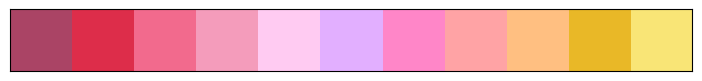

In [5]:
#defining colour palette
red = ["#4f000b","#720026","#ce4257","#ff7f51","#ff9b54"]
bo = ["#6930c3","#5e60ce","#0096c7","#48cae4","#ade8f4","#ff7f51","#ff9b54","#ffbf69"]
pink = ["#aa4465","#dd2d4a","#f26a8d","#f49cbb","#ffcbf2","#e2afff","#ff86c8","#ffa3a5","#ffbf81","#e9b827","#f9e576"]
custom_palette(pink)


## 📉 Basic Analysis

**Shape of the data**

In [6]:
df.shape

(986, 11)

**Inference**

- Shape of the data is 986 * 11
- Number of rows: 986
- Number of Columns: 11

**First Few Rows**

In [7]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


**Columns in the dataframe**

In [8]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

**Concise Summary**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


**Inference**

- There are no missing values in the dataset.
- All columns are of numeric type

**Descriptive Statistics**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


**Missing Values Check**

In [11]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

**Inference**

There are no missing values in the dataset